# Funções importantes

`model.classes_` 
* Retorna as classes do modelo
* Usado para saber qual é a classe 0, 1, ..., e entender a ordem das probabilidades retornadas pelo `predict_proba`
``` python
print(model.classes_)
# Ex: ['comedy', 'drama']
```
-----------------------
`model.coef_`
* Retorna uma matriz com os pesos aprendidos pelo modelo (um vetor por classe, caso multiclasse)
* Usado para saber quais palavras contribuem positivamente ou negativamente para cada classe
``` python
model.named_steps['clf'].coef_[0][idx]  # Peso da palavra no índice `idx`
```
Para saber as n palavras mais relevantes para cada classe, podemos usar o `argsort`:
``` python
# Ex: 10 palavras mais relevantes para a classe 0 (comédia)
model.named_steps['clf'].coef_[0].argsort()[-10:][::-1]
# Ex: 10 palavras mais relevantes para a classe 1 (drama)
model.named_steps['clf'].coef_[1].argsort()[-10:][::-1]

# Outro jeito de fazer isso é:
vectorizer = pipe.named_steps['tfidf']
clf = pipe.named_steps['clf']

features = vectorizer.get_feature_names_out()
coefs = clf.coef_[0]

indices = np.argsort(coefs)[::-1][:10]
print("Top 10 features:")
for i in indices:
    print(f"{features[i]}: {coefs[i]}")

# Para um problema multiclasse, podemos fazer o mesmo para cada classe:
vectorizer = pipeline.named_steps['tfidf']
clf = pipeline.named_steps['clf']

features = vectorizer.get_feature_names_out()
classes = clf.classes_
coefs = clf.coef_  # Agora é (n_classes, n_features)

# Exibindo as 10 palavras mais relevantes para cada classe
for class_idx, class_label in enumerate(classes):
    print(f"\nTop 10 palavras para a classe '{class_label}':")
    top_indices = np.argsort(coefs[class_idx])[::-1][:10]  # Top 10 maiores
    for i in top_indices:
        print(f"{features[i]}: {coefs[class_idx][i]}")
```
-----------------------

`model.predict_proba([texto])`
* Retorna um vetor contendo as probabilidades de cada classe para o texto passado como parâmetro
* Usado para entender a confiança do modelo em relação a cada classe
``` python
model.predict_proba([texto])
# Ex: [0.1, 0.9] -> 10% de chance de ser comédia, 90% de chance de ser drama
```
-----------------------

`model.predict([texto])`
* Retorna a classe prevista para o texto passado como parâmetro
* Usado para fazer previsões em novos dados
``` python
model.predict([texto])
# Ex: 'drama'
```

-----------------------
`model.decision_function([texto])`
* Retorna um vetor com os valores de decisão para cada classe (não normalizados)
* Usado para entender a distância do texto em relação à fronteira de decisão entre as classes
``` python
model.decision_function([texto])
# Ex: [0.5, -0.5] -> 0.5 para a classe 0 (comédia), -0.5 para a classe 1 (drama)
```
-----------------------


Função | O que faz
-----------------------|-----------------------
.classes_ | Mostra os rótulos das classes
.predict() | Retorna a classe prevista
.predict_proba() | Retorna probabilidade de cada classe
.decision_function() | Retorna logits (pré-sigmoide ou pré-softmax)
.coef_ | Pesos das features (palavras)
.intercept_ | Bias da função logística
.vocabulary_ | Índices das palavras no vetor TF-IDF
.get_feature_names_out() | Lista de palavras no vocabulário
classification_report() | Avalia desempenho por classe
softmax(z) | Transforma logits em probabilidades (multiclasse)
1 / (1 + np.exp(-z)) | Transforma logit em probabilidade (binário)

| Situação | Função usada | decision_function retorna | predict_proba retorna|
|----------------|----------------|---------------------|---------------------|
| Binária | Sigmoide | 1 valor | [P(classe 0), P(classe 1)]
| Multiclasse | Softmax | vetor (n_classes) | [P(classe 0), P(classe 1), ...]

# PCA vs t-SNE
| PCA | t-SNE |
|----------------|----------------|
| Redução de dimensionalidade, de forma  a preservar a variância dos dados | Redução de dimensionalidade, de forma a preservar a distância entre os pontos |
|O PCA "gira" o sistema de coordenadas para achar o plano ótimo de visualização, e projeta os dados ali — isso é o que chamamos de preservar a variância global ao reduzir dimensões.|O t-SNE tenta preservar a distância entre os pontos, de forma que pontos próximos no espaço original fiquem próximos no espaço reduzido. Isso é o que chamamos de preservar a distância local ao reduzir dimensões.|
|O PCA é mais rápido e escalável, mas pode não capturar bem a estrutura local dos dados.|O t-SNE é mais lento e menos escalável, mas pode capturar melhor a estrutura local dos dados.|

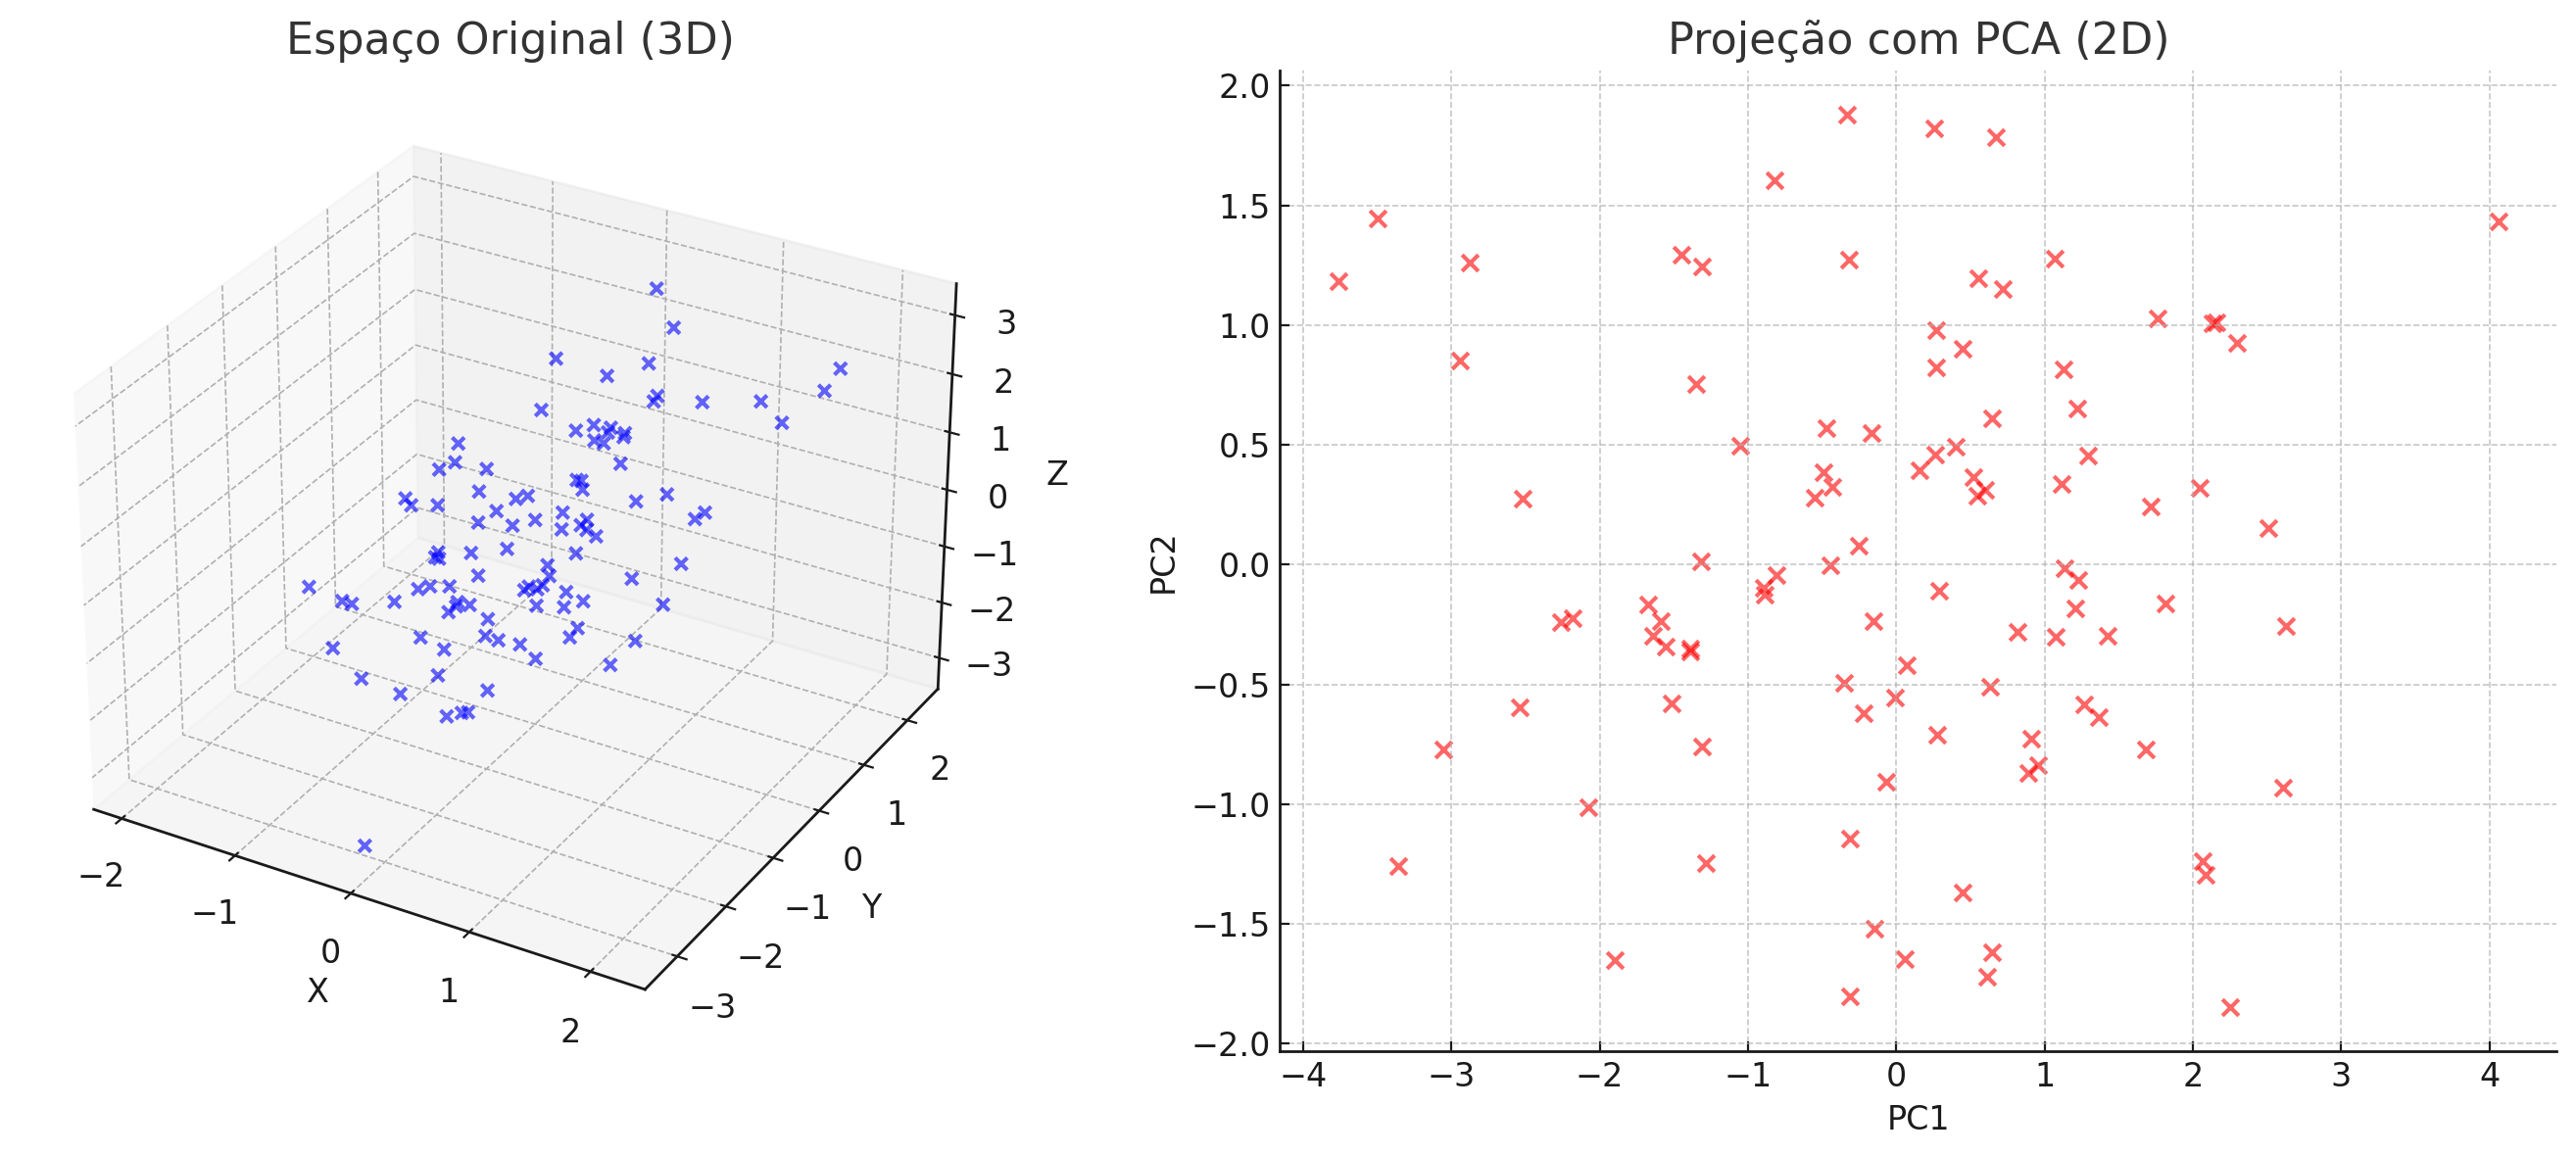